## KLASIFIKASI CITRA MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK (CNN)

Nama : Dewan Dinata Tarigan | Email : dinatadewan@gmail.com | ID Dicoding : dwndnt

### Data Preparation & Pre-processing

Tahap ini melibatkan proses pemisahan data berdasarkan kelas, di mana setiap kelas mewakili satu kategori, yaitu 'rock', 'paper', dan 'scissors'. Setelah pemisahan, dataset akan dibagi menjadi dua subset, yaitu set training dan set validasi. Ukuran set validasi ialah 40% dari total dataset. Setelah pemisahan, dilakukan pra-pemrosesan data menggunakan metode augmentasi.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import shutil

# Load direktori dataset
data_dir = 'rockpaperscissors'

# List subdirektori dataset
class_subdirectories = ['rock', 'paper', 'scissors']

# Membuat subdirektori train dan val
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# memindahkan file ke subdirektori
def move_files(source_dir, target_dir, file_extension):
    for filename in os.listdir(source_dir):
        if filename.endswith(file_extension):
            source = os.path.join(source_dir, filename)
            destination = os.path.join(target_dir, filename)
            os.makedirs(os.path.dirname(destination), exist_ok=True)
            shutil.move(source, destination)

# Splitting Dataset
for class_dir in class_subdirectories:
    class_path = os.path.join(data_dir, class_dir)
    train_class_dir = os.path.join(train_dir, class_dir)
    validation_class_dir = os.path.join(validation_dir, class_dir)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(validation_class_dir, exist_ok=True)

    class_files = [file for file in os.listdir(class_path) if file.endswith(".png")]
    random.shuffle(class_files)
    split_index = int(0.4 * len(class_files))

    train_files = class_files[:split_index]
    validation_files = class_files[split_index:]


    for file in train_files:
        source = os.path.join(class_path, file)
        destination = os.path.join(train_class_dir, file)
        shutil.move(source, destination)

    for file in validation_files:
        source = os.path.join(class_path, file)
        destination = os.path.join(validation_class_dir, file)
        shutil.move(source, destination)

# Augmentasi citra dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# generate train & val
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=class_subdirectories
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=class_subdirectories
)


Found 874 images belonging to 3 classes.
Found 1314 images belonging to 3 classes.


### MEMBANGUN MODEL CNN

Setelah melakukan pre-processing & splitting data, selanjutnya ialah membangun model CNN menggunakan beberapa parameter, seperti berikut :

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])


#### PELATIHAN MODEL CNN

Kemudian model CNN dilatih menggunakan set training yang sudah disiapkan sebelumnya.

In [3]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5,              
    restore_best_weights=True 
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=100, 
    validation_data=validation_generator,
    callbacks=[early_stopping] 
)

Epoch 1/100
28/28 [==============================] - 31s 1s/step - loss: 1.2111 - accuracy: 0.3844 - val_loss: 0.9405 - val_accuracy: 0.5639
Epoch 2/100
28/28 [==============================] - 34s 1s/step - loss: 1.0012 - accuracy: 0.5435 - val_loss: 0.9034 - val_accuracy: 0.5746
Epoch 3/100
28/28 [==============================] - 30s 1s/step - loss: 0.8513 - accuracy: 0.6430 - val_loss: 0.5756 - val_accuracy: 0.7420
Epoch 4/100
28/28 [==============================] - 34s 1s/step - loss: 0.6422 - accuracy: 0.7346 - val_loss: 0.4207 - val_accuracy: 0.8097
Epoch 5/100
28/28 [==============================] - 37s 1s/step - loss: 0.5099 - accuracy: 0.8055 - val_loss: 0.3121 - val_accuracy: 0.8775
Epoch 6/100
28/28 [==============================] - 34s 1s/step - loss: 0.5290 - accuracy: 0.7780 - val_loss: 0.2877 - val_accuracy: 0.9231
Epoch 7/100
28/28 [==============================] - 31s 1s/step - loss: 0.4658 - accuracy: 0.8135 - val_loss: 0.2373 - val_accuracy: 0.9315
Epoch 8/100
2

### EVALUASI MODEL

Selanjutnya model dievaluasi menggunakan set validasi

In [4]:
test_loss, test_accuracy = model.evaluate(validation_generator)

print("Akurasi model: {:.2f}%".format(test_accuracy * 100))


42/42 [==============================] - 7s 154ms/step - loss: 0.0280 - accuracy: 0.9947
Akurasi model: 99.47%


### UJI COBA MODEL

Pada tahap ini dilakukan uji coba menggunakan salah satu data citra pada dataset

1/1 [==============================] - 0s 100ms/step


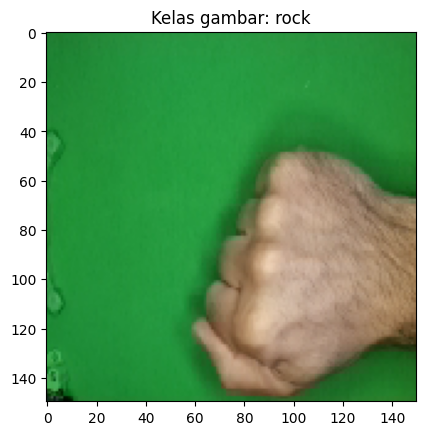

In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

image_path = 'rockpaperscissors/train/rock/00nKV8oHuTGi20gq.png'

img = image.load_img(image_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.  # Normalisasi

predictions = model.predict(img)
class_index = np.argmax(predictions[0])

class_names = ['rock', 'paper', 'scissors']

predicted_class = class_names[class_index]

plt.imshow(img[0])
plt.title(f'Kelas gambar: {predicted_class}')
plt.show()


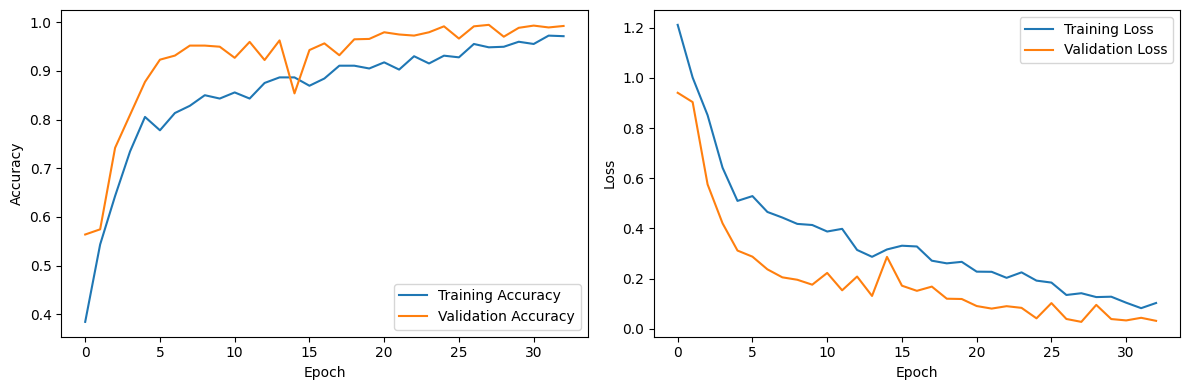

In [7]:
import matplotlib.pyplot as plt

# Visualisasi akurasi pelatihan dan validasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi loss pelatihan dan validasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
